In [61]:
import os
import pickle

In [62]:
RESULTS_FOLDER = "results"
models = os.listdir(RESULTS_FOLDER)

res = {}
for model in models:
    with open(os.path.join(RESULTS_FOLDER, model, "shifts_results.pkl"), "rb") as f:
        res[model] = pickle.load(f)

res

{'openl3': {'Human/Cough': {'n_2020': 0, 'n_2021': 8, 'n_granollers': 14},
  'Human/Movement': {'n_2020': 106,
   'n_2021': 41,
   'n_granollers': 0,
   '2021': {'p_values': [0.778914912323089,
     0.42017824559389316,
     0.000624266195173816,
     2.9232560329271698e-05,
     0.17539102860197298,
     7.629377009013217e-07,
     0.10460220751268683,
     0.007805488295191314,
     0.003560398198428962,
     0.007805488295191314,
     0.17539102860197298,
     0.10460220751268683,
     0.5945211330032322,
     0.9256519492948191,
     0.778914912323089,
     0.03180009083874479,
     0.42017824559389316,
     0.059213286698375445,
     0.000624266195173816,
     0.10460220751268683,
     0.5945211330032322,
     0.42017824559389316,
     2.9232560329271698e-05,
     0.01618915894489128,
     0.003560398198428962,
     0.10460220751268683,
     0.10460220751268683,
     0.059213286698375445,
     0.00023930204148334494,
     0.10460220751268683,
     0.007805488295191314,
     0.0006

In [63]:
res.keys()

dict_keys(['openl3', 'wav2vec', 'yamnet'])

In [64]:
res["openl3"].keys()

dict_keys(['Human/Cough', 'Human/Movement', 'Human/Movement/Steps', 'Human/Music', 'Human/Voice', 'Industrial/Construction', 'Industrial/Industry', 'Industrial/Vacuum', 'Industrial/Ventilation', 'Nature/Animals/Bird', 'Nature/Animals/Cat', 'Nature/Animals/Dog', 'Nature/Elements/Water', 'Nature/Elements/Wind', 'Nature/Vegetation', 'Signals', 'Signals/Alarm', 'Signals/Bells', 'Signals/Klaxon', 'Signals/Siren', 'Things/Blind', 'Things/Door', 'Things/Movement', 'Things/Trolley', 'Transport/Motorized', 'Transport/Motorized/Air', 'Transport/Motorized/Rail', 'Transport/Motorized/Road', 'Transport/Non-motorized'])

In [65]:
res["openl3"]["Human/Cough"].keys()

dict_keys(['n_2020', 'n_2021', 'n_granollers'])

In [66]:
res["openl3"]["Human/Voice"].keys()

dict_keys(['n_2020', 'n_2021', 'n_granollers', '2021', 'granollers'])

In [67]:
res["openl3"]["Human/Voice"]["n_2020"]

253

In [68]:
res["openl3"]["Human/Voice"]["2021"].keys()

dict_keys(['p_values', 'avg_2020', 'avg_2021', 'centr_dist', 'avg_dist_2020', 'avg_dist_2021', 'dist_20_2021', 'dist_2021_20'])

In [69]:
res["openl3"]["Human/Voice"]["granollers"].keys()

dict_keys(['p_values', 'avg_2020', 'avg_granollers', 'centr_dist', 'avg_dist_2020', 'avg_dist_granollers', 'dist_20_granollers', 'dist_granollers_20'])

In [70]:
len(res["openl3"]["Human/Voice"]["2021"]["p_values"])

512

In [71]:
res["openl3"]["Human/Voice"]["2021"]["avg_2020"].shape

(512,)

In [72]:
res["openl3"]["Human/Voice"]["2021"]["avg_2021"].shape

(512,)

In [73]:
res["openl3"]["Human/Voice"]["2021"]["centr_dist"]

3.1353905

In [74]:
res["openl3"]["Human/Voice"]["2021"]["avg_dist_2020"]

10.81791

In [75]:
res["openl3"]["Human/Voice"]["2021"]["avg_dist_2021"]

10.450963

In [76]:
res["openl3"]["Human/Voice"]["2021"]["dist_20_2021"]

10.903623

In [77]:
res["openl3"]["Human/Voice"]["2021"]["dist_2021_20"]

11.2250395

In [78]:
datasets = sorted(res.keys())
all_labels = sorted(res[datasets[0]].keys())

for dataset in datasets:
    for label in all_labels:
        print(50 * "-")
        print(f"{dataset} - {label}")
        print(50 * "-")
        n_2020 = res[dataset][label]["n_2020"]
        n_2021 = res[dataset][label]["n_2021"]
        n_granollers = res[dataset][label]["n_granollers"]
        print(f"2020: {n_2020}, 2021: {n_2021}, Granollers: {n_granollers}")

        print(50 * "*")
        print("Comparison with 2020")
        try:
            for key in res[dataset][label]["2021"].keys():
                if key == "p_values":
                    n_shift = len([el for el in res[dataset][label]["2021"]["p_values"] if el < 0.05])
                    print(f"Shifts in 2021: {n_shift}")
                else:
                    print(f"{key}: {res[dataset][label]['2021'][key]}")
        except KeyError:
            print("Too few values to calculate shift with 2021")

        print(50 * "*")
        print("Comparison with Granollers")
        try:
            for key in res[dataset][label]["granollers"].keys():
                if key == "p_values":
                    n_shift = len([el for el in res[dataset][label]["granollers"]["p_values"] if el < 0.05])
                    print(f"Shifts in Granollers: {n_shift}")
                else:
                    print(f"{key}: {res[dataset][label]['granollers'][key]}")
        except KeyError:
            print("Too few values to calculate shift with Granollers")

--------------------------------------------------
openl3 - Human/Cough
--------------------------------------------------
2020: 0, 2021: 8, Granollers: 14
**************************************************
Comparison with 2020
Too few values to calculate shift with 2021
**************************************************
Comparison with Granollers
Too few values to calculate shift with Granollers
--------------------------------------------------
openl3 - Human/Movement
--------------------------------------------------
2020: 106, 2021: 41, Granollers: 0
**************************************************
Comparison with 2020
Shifts in 2021: 248
avg_2020: [1.9362744  2.4496927  2.1382651  2.486185   2.896004   1.0257413
 1.5379169  2.1819758  1.8737631  4.377873   2.1886067  3.0648677
 2.482285   2.0312037  2.894256   2.3549345  1.9574121  1.634339
 2.8742318  1.870821   1.860201   3.4549005  1.5920055  2.449526
 3.2579796  2.5112817  1.721159   1.6428046  1.601994   2.6297097
 2.583082

Dataset: openl3
Average shifts in 2021: 269.5263157894737
Average centroids distance in 2021: 8.590879904596429
Average distance to centroids in 2021: 13.055769719575581
Average distance to same centroids in 2021: 8.945965465746427


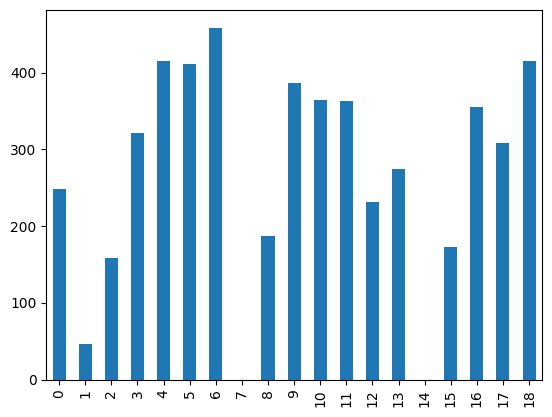

Average shifts in Granollers: 347.07142857142856
Average centroids distance in Granollers: 13.457660334450859
Average distance to centroids in Granollers: 15.466349261147636
Average distance to same centroids in Granollers: 7.338511620249067


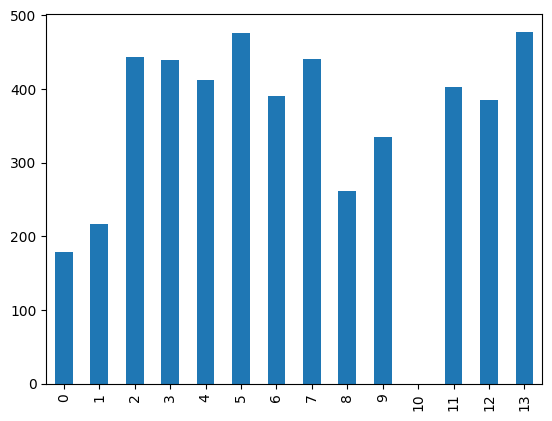

Dataset: wav2vec
Average shifts in 2021: 624.578947368421
Average centroids distance in 2021: 2.3239284393034483
Average distance to centroids in 2021: 3.1340387745907434
Average distance to same centroids in 2021: 1.6578811183571815


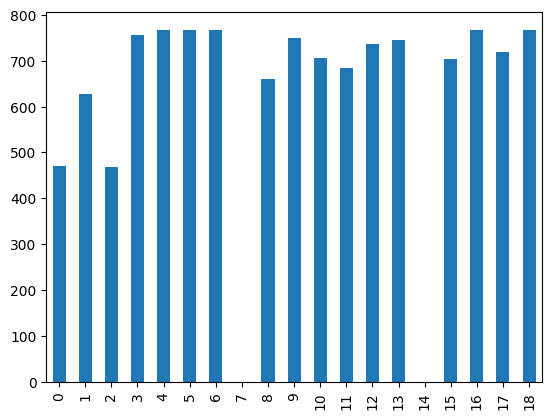

Average shifts in Granollers: 654.3571428571429
Average centroids distance in Granollers: 2.3301002170358385
Average distance to centroids in Granollers: 2.940698564052582
Average distance to same centroids in Granollers: 1.4940403522923589


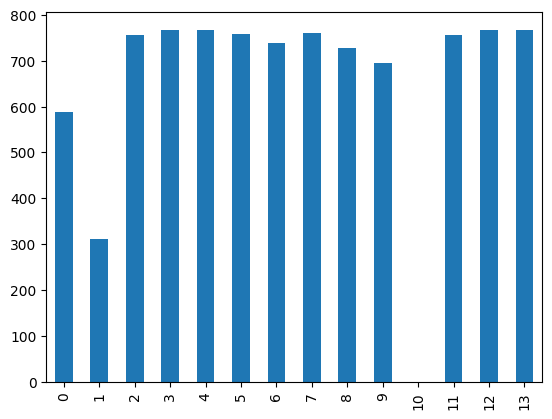

Dataset: yamnet
Average shifts in 2021: 102.6842105263158
Average centroids distance in 2021: 4.140033577617846
Average distance to centroids in 2021: 6.864461886255365
Average distance to same centroids in 2021: 5.1176344720940845


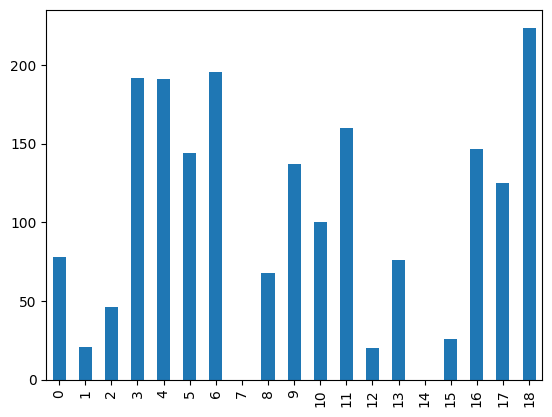

Average shifts in Granollers: 165.28571428571428
Average centroids distance in Granollers: 3.5392394065856934
Average distance to centroids in Granollers: 5.248449155262539
Average distance to same centroids in Granollers: 3.6151047008378163


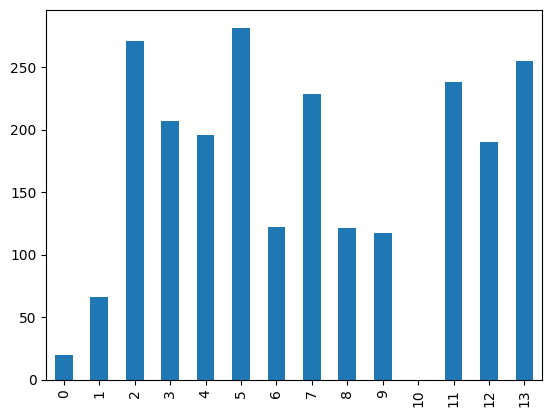

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

datasets = sorted(res.keys())
all_labels = sorted(res[datasets[0]].keys())

for dataset in datasets:
    print(f"Dataset: {dataset}")
    avg_shifts_2021 = []
    avg_centr_dist_2021 = []
    avg_dist_to_centr_2021 = []
    avg_dist_same_2021 = []
    avg_shifts_granollers = []
    avg_centr_dist_granollers = []
    avg_dist_to_centr_granollers = []
    avg_dist_same_granollers = []
    for label in all_labels:
        #print(50 * "-")
        #print(f"{dataset} - {label}")
        #print(50 * "-")
        n_2020 = res[dataset][label]["n_2020"]
        n_2021 = res[dataset][label]["n_2021"]
        n_granollers = res[dataset][label]["n_granollers"]
        #print(f"2020: {n_2020}, 2021: {n_2021}, Granollers: {n_granollers}")

        #print(50 * "*")
        #print("Comparison with 2020")
        try:
            for key in res[dataset][label]["2021"].keys():
                if key == "p_values":
                    n_shift = len([el for el in res[dataset][label]["2021"]["p_values"] if el < 0.05])
                    avg_shifts_2021.append(n_shift)
                    avg_centr_dist_2021.append(res[dataset][label]["2021"]["centr_dist"])
                    avg_dist_to_centr_2021.append(res[dataset][label]["2021"]["dist_20_2021"])
                    avg_dist_same_2021.append(res[dataset][label]["2021"]["avg_dist_2021"])
                    #print(f"Shifts in 2021: {n_shift}")
                else:
                    #print(f"{key}: {res[dataset][label]['2021'][key]}")
                    pass
        except KeyError:
            pass#print("Too few values to calculate shift with 2021")

        #print(50 * "*")
        #print("Comparison with Granollers")
        try:
            for key in res[dataset][label]["granollers"].keys():
                if key == "p_values":
                    n_shift = len([el for el in res[dataset][label]["granollers"]["p_values"] if el < 0.05])
                    avg_shifts_granollers.append(n_shift)
                    avg_centr_dist_granollers.append(res[dataset][label]["granollers"]["centr_dist"])
                    avg_dist_to_centr_granollers.append(res[dataset][label]["granollers"]["dist_20_granollers"])
                    avg_dist_same_granollers.append(res[dataset][label]["granollers"]["avg_dist_granollers"])
                    #print(f"Shifts in Granollers: {n_shift}")
                else:
                    #print(f"{key}: {res[dataset][label]['granollers'][key]}")
                    pass
        except KeyError:
            pass#print("Too few values to calculate shift with Granollers")
    
    print(f"Average shifts in 2021: {sum(avg_shifts_2021) / len(avg_shifts_2021)}")
    print(f"Average centroids distance in 2021: {sum(avg_centr_dist_2021) / len(avg_centr_dist_2021)}")
    print(f"Average distance to centroids in 2021: {sum(avg_dist_to_centr_2021) / len(avg_dist_to_centr_2021)}")
    print(f"Average distance to same centroids in 2021: {sum(avg_dist_same_2021) / len(avg_dist_same_2021)}")
    pd.Series(avg_shifts_2021).plot.bar()
    plt.show()
    print(f"Average shifts in Granollers: {sum(avg_shifts_granollers) / len(avg_shifts_granollers)}")
    print(f"Average centroids distance in Granollers: {sum(avg_centr_dist_granollers) / len(avg_centr_dist_granollers)}")
    print(f"Average distance to centroids in Granollers: {sum(avg_dist_to_centr_granollers) / len(avg_dist_to_centr_granollers)}")
    print(f"Average distance to same centroids in Granollers: {sum(avg_dist_same_granollers) / len(avg_dist_same_granollers)}")
    pd.Series(avg_shifts_granollers).plot.bar()
    plt.show()

In [80]:
datasets = sorted(res.keys())
all_labels = sorted(res[datasets[0]].keys())

for dataset in datasets:
    print(f"Dataset: {dataset}")
    avg_shifts_2021 = {}
    avg_shifts_granollers = {}
    for label in all_labels:
        #print(50 * "-")
        #print(f"{dataset} - {label}")
        #print(50 * "-")
        n_2020 = res[dataset][label]["n_2020"]
        n_2021 = res[dataset][label]["n_2021"]
        n_granollers = res[dataset][label]["n_granollers"]
        #print(f"2020: {n_2020}, 2021: {n_2021}, Granollers: {n_granollers}")

        #print(50 * "*")
        #print("Comparison with 2020")
        try:
            for key in res[dataset][label]["2021"].keys():
                if key == "p_values":
                    n_shift = len([el for el in res[dataset][label]["2021"]["p_values"] if el < 0.05])
                    avg_shifts_2021[label] = n_shift
                    #print(f"Shifts in 2021: {n_shift}")
                else:
                    #print(f"{key}: {res[dataset][label]['2021'][key]}")
                    pass
        except KeyError:
            pass#print("Too few values to calculate shift with 2021")

        #print(50 * "*")
        #print("Comparison with Granollers")
        try:
            for key in res[dataset][label]["granollers"].keys():
                if key == "p_values":
                    n_shift = len([el for el in res[dataset][label]["granollers"]["p_values"] if el < 0.05])
                    avg_shifts_granollers[label] = n_shift
                    #print(f"Shifts in Granollers: {n_shift}")
                else:
                    #print(f"{key}: {res[dataset][label]['granollers'][key]}")
                    pass
        except KeyError:
            pass#print("Too few values to calculate shift with Granollers")
    
    print("2021")
    print(sorted(avg_shifts_2021.items(), key=lambda x: x[1], reverse=True))
    print("Granollers")
    print(sorted(avg_shifts_granollers.items(), key=lambda x: x[1], reverse=True))

Dataset: openl3
2021
[('Nature/Animals/Bird', 459), ('Industrial/Construction', 415), ('Transport/Motorized/Road', 415), ('Industrial/Industry', 411), ('Nature/Elements/Wind', 387), ('Signals/Alarm', 365), ('Signals/Bells', 363), ('Things/Trolley', 355), ('Human/Voice', 322), ('Transport/Motorized', 309), ('Signals/Siren', 275), ('Human/Movement', 248), ('Signals/Klaxon', 232), ('Nature/Animals/Dog', 187), ('Things/Movement', 173), ('Human/Music', 159), ('Human/Movement/Steps', 46), ('Nature/Animals/Cat', 0), ('Things/Door', 0)]
Granollers
[('Transport/Motorized/Road', 478), ('Nature/Animals/Bird', 476), ('Human/Voice', 444), ('Nature/Elements/Wind', 441), ('Industrial/Construction', 440), ('Industrial/Industry', 412), ('Things/Movement', 402), ('Nature/Animals/Dog', 390), ('Things/Trolley', 385), ('Signals/Siren', 335), ('Signals/Klaxon', 262), ('Human/Music', 216), ('Human/Movement/Steps', 178), ('Things/Door', 0)]
Dataset: wav2vec
2021
[('Industrial/Industry', 768), ('Nature/Animals